# Machine Learning: Decision Tree Analysis for Bank Customer Churn

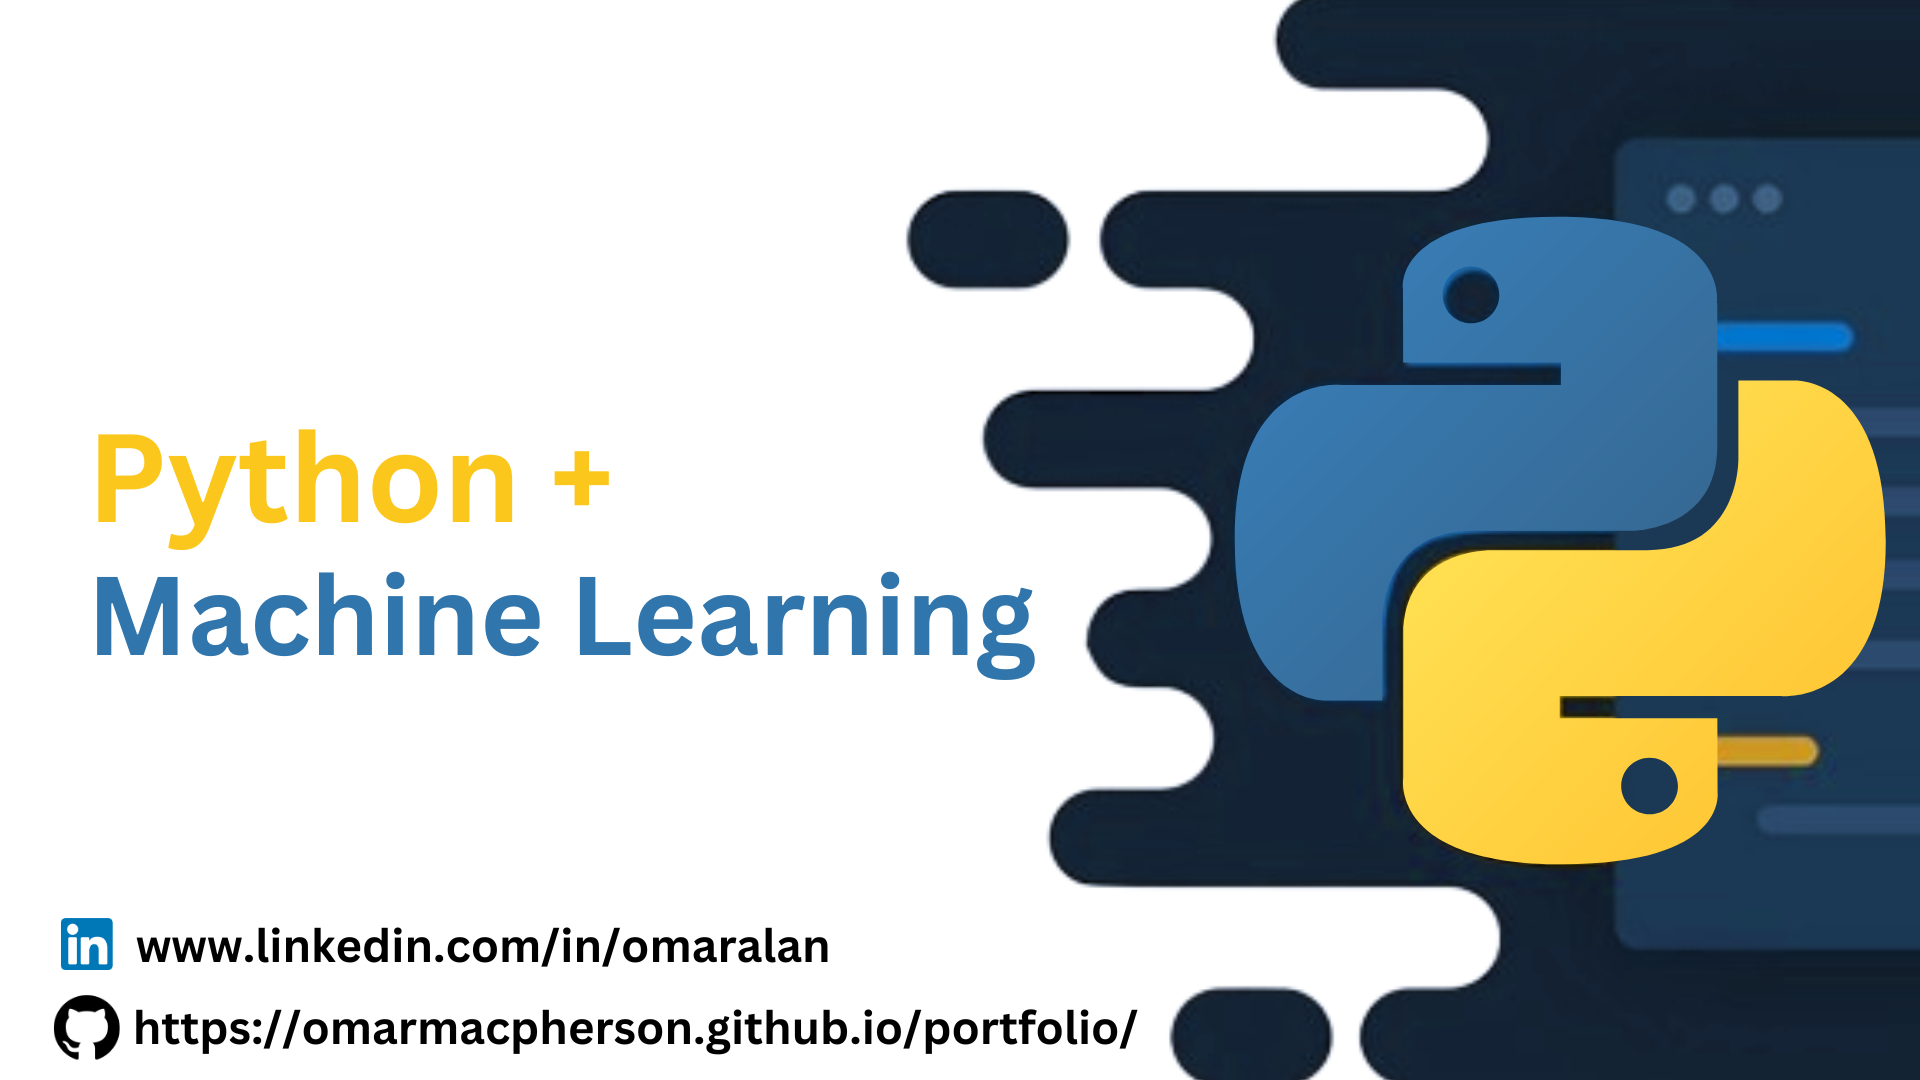

This project will analyze a bank dataset (available on Kaggle) with over 10,000 customers. Dataset has 18 columns with various features that may influence a customer's decision to leave the bank and choose another financial provider.

This report includes:

**A) Data Cleaning:** Performed a quick scan of the dataset, handled missing and duplicates values, unnecesary columns and standardized column names for readibility.

**B) Exploratory Data Analysis (EDA):** Visualizing the data, viewing statistics, gain insights and patterns identification.

**C) Correlation Analysis:** Finding relationships between different features. Selecting most important attributes for machine learning model.

**D) Model Building:** Creating a Decision Tree Model on customer churn prediction. The data will be split into train and test (80,20).

The goal of using the Decision Tree Model is to identify patterns and behaviors of customers that may influence their decision to stop being customers of the bank.

# A) Data Cleaning

Before starting our Data Cleaning, it is important to import the necessary tools for our project and set up our environment.

1. **Importing Python Libraries**

    1. Pandas: (Data structures and data analysis)
    2. Seaborn: (Statistical graphics)
    3. Matplotlib: (Visualizations)
    4. Numpy: (Numerical operations, multi-dimensional arrays and matrices)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. **Reading CSV file.** The DataFrame "df" is used to display and verify correct integration and properly working.

In [22]:
df = pd.read_csv("/Users/omar/Desktop/PROJECT PYTHON/DATASET/Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10000,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10001,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10002,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


3. **Running df.isnull()** to check for missing values in the dataset. This command is useful for avoiding future mistakes in our analysis and solving issues at an early stage.

**The output shows zero records** in all the columns, which is a good sign for our process. 

In [23]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

4. **Running df.duplicated()** to check for duplicate elements in our dataset. This is an important step to follow best practices and avoid future misinterpretations in our visualizations.

As shown in the result, **4 duplicates** records were found that could affect our future analysis.

In [24]:
df.duplicated().sum()

4

5. **Running df.drop_duplicates()** to remove duplicate rows from the DataFrame.

Initially, the dataset had 10,004 records, including the 4 duplicate elements identified in the previous query. After applying the Pandas function, the **new outpout shows 10,000** records in the DataFrame.

The use of **"df.shape"** provides quick information about the number of rows and columns, confirming that the duplicates have been successfully removed.

In [25]:
df.drop_duplicates(inplace=True)
print("Duplicates removed, new shape:", df.shape)

Duplicates removed, new shape: (10000, 18)


In [26]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10000,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10001,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10002,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


**"RowNumber"** is an unnecessary column in the bank's data that does not provide any additional or valuable information. It is not necessary to wait to determine that "RowNumber" needs to be removed.

In [27]:
df.drop(['RowNumber'], axis=1, inplace=True)
print("Column removed, new shape:", df.shape)

Column removed, new shape: (10000, 17)


In [28]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
10000,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
10001,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
10002,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


6. **Running df.info()** to obtain a summary of the DataFrame, identifying the data types in the dataset. This function is particularly useful for gaining a good overview of the dataset.

The result indicates that the dataset is organized primarily in int64 and float64, which is beneficial for the process. There are a few "object" data types, which will be analyzed later to determine if they need to be removed for the predictive model.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

7. **Running df.rename()**, the columns will be renamed following the **"snake_case"** variable style, in line with best practices. This approach enhances readability and ensures all information is in lowercase. Subsequently, **df.info()** is run to confirm that the data has been updated.

In [30]:
df.rename(columns={
    'CustomerId': 'customer_id',
    'Surname': 'surname',
    'CreditScore': 'credit_score',
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure_years',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'has_exited',
    'Complain': 'complain',
    'Satisfaction Score': 'satisfaction_score',
    'Card Type': 'card_type',
    'Point Earned': 'points_earned'
}, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   surname             10000 non-null  object 
 2   credit_score        10000 non-null  int64  
 3   geography           10000 non-null  object 
 4   gender              10000 non-null  object 
 5   age                 10000 non-null  int64  
 6   tenure_years        10000 non-null  int64  
 7   balance             10000 non-null  float64
 8   num_of_products     10000 non-null  int64  
 9   has_credit_card     10000 non-null  int64  
 10  is_active_member    10000 non-null  int64  
 11  estimated_salary    10000 non-null  float64
 12  has_exited          10000 non-null  int64  
 13  complain            10000 non-null  int64  
 14  satisfaction_score  10000 non-null  int64  
 15  card_type           10000 non-null  object 
 16  points_ea

# B) Exploratory Data Analysis (EDA)

This stage is important for identifying patterns and statistics that can help understand the dataset. Understanding the behavior of the top customers is crucial for identifying what the bank is doing well to retain these valuable clients and ensuring they continue to use their credit cards.

1. **Running df.sort_values()**, to sort the "points_earned" column, which indicates how frequently a customer is using their products.

The top 20 customers based on this criterion are displayed using **head(20)**.

In [32]:
df.sort_values(by="points_earned", ascending=False).head(20)

,customer_id,surname,credit_score,geography,gender,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,has_exited,complain,satisfaction_score,card_type,points_earned
1249,15803681,Sims,803,France,Female,26,4,0.00,2,1,1,181208.47,0,0,2,DIAMOND,1000
8917,15804962,Nnaife,606,France,Male,36,1,155655.46,1,1,1,192387.51,1,1,4,DIAMOND,1000
8510,15616833,Wang,678,Spain,Male,27,2,0.00,2,1,1,13221.25,0,0,4,GOLD,1000
4273,15707132,Yudin,465,France,Male,33,5,0.00,2,0,1,78698.09,0,0,5,GOLD,1000
4289,15657529,Chin,714,Germany,Male,53,1,99141.86,1,1,1,72496.05,1,1,3,PLATINUM,1000
2877,15585284,Thomson,604,Spain,Female,35,7,147285.52,1,1,1,57807.05,0,0,5,PLATINUM,1000
2012,15726267,Paterson,570,France,Male,32,9,117337.54,2,0,1,62810.91,0,0,4,DIAMOND,1000
9752,15591985,Stewart,708,France,Female,51,8,70754.18,1,1,1,92920.04,1,1,2,PLATINUM,1000
9226,15667944,Onuchukwu,679,France,Male,39,0,86843.61,1,0,1,159830.58,0,0,5,PLATINUM,1000
2850,15579262,Shearston,497,France,Male,41,9,0.00,1,0,0,22074.48,0,0,1,PLATINUM,1000


To determine if there is a gender-based pattern in the usage of bank products, the dataset is organized using **df.sort_values()** to highlight the top 20 customers who have earned the most points. This is followed by applying **value_counts()** on the gender column to ascertain the distribution by gender among these top customers.

In [33]:
top_20_customers_by_points_earned = df.sort_values(by="points_earned", ascending=False).head(20)
gender_counts = top_20_customers_by_points_earned['gender'].value_counts()
display(gender_counts)

gender
Male      13
Female     7
Name: count, dtype: int64

The number of Males is **85.71%** greater than the number of females.

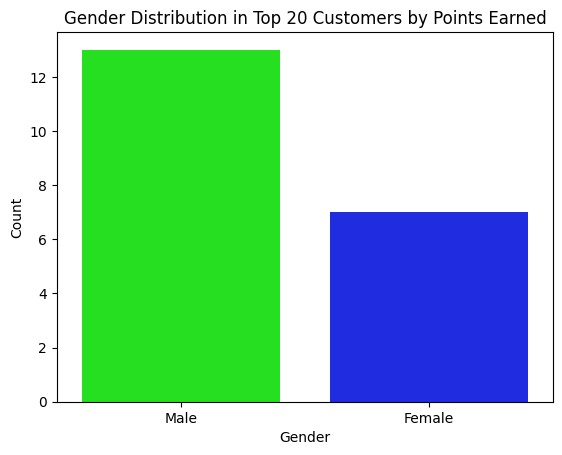

In [109]:
gender_counts = {'Male': 13, 'Female': 7}
gender_counts = pd.Series(gender_counts)
palette = sns.color_palette("hsv", len(gender_counts))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette=palette)
plt.title('Gender Distribution in Top 20 Customers by Points Earned')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend([],[], frameon=False)
plt.show()

2. **Running sns.histplot()**, to Understand the demographic distribution by age is essential for analyzing customer patterns at the bank. Visualization libraries such as **Seaborn** and **Matplotlib**, along with numerical operations facilitated by **NumPy**, are employed to create a histogram. 

The function **sns.histplot()** is used, with the data divided into 20 bins to clearly delineate the distribution's shape and spread.

The histogram reveals a pronounced peak in the 30 to 40 age range, indicating that a majority of the bank's customers fall within this demographic.

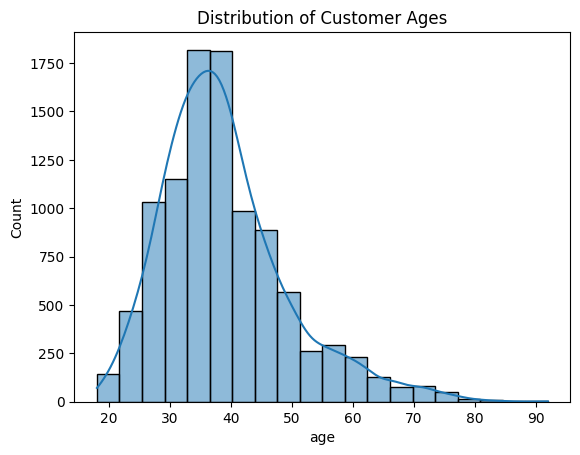

In [35]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.show()

Analyzing the distribution of account balances among bank customers provides critical insights into customer behaviors that could influence retention and churn.

By utilizing a histogram generated through the **sns.histplot()** function from the **Seaborn** library, distinct patterns emerge, particularly highlighting that a significant segment of customers maintain low or zero balances. This observation warrants further exploration to determine if there's a correlation with customer churn.

The distribution peaks around **$100,000** and diminishes near **200,000 dollars**, underscoring the varied financial engagement levels across different customer segments.

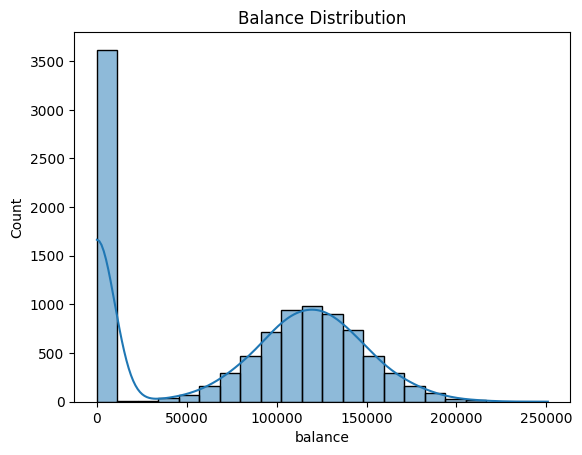

In [36]:
sns.histplot(df['balance'], kde=True)
plt.title('Balance Distribution')
plt.show()

3. **Running sns.boxplot().** A **boxplot**, created using **Seaborn**, efficiently illustrates the distribution of credit scores across male and female customers. This visualization method is optimal for detecting outliers and comparing ranges.

Both genders display similar median credit scores in the **600-700 range**, indicating a uniform credit evaluation process across genders. This uniformity across genders implies that credit score discrepancies are unlikely to be a significant factor in customer churn decisions.

note: In seaborn library version v0.14.0, using palette without assigning hue is deprecated. To resolve this and avoid future compatibility issues, hue was explicitly set to 'gender', the categorical variable used on the x-axis, ensuring correct color mapping in the visualization.

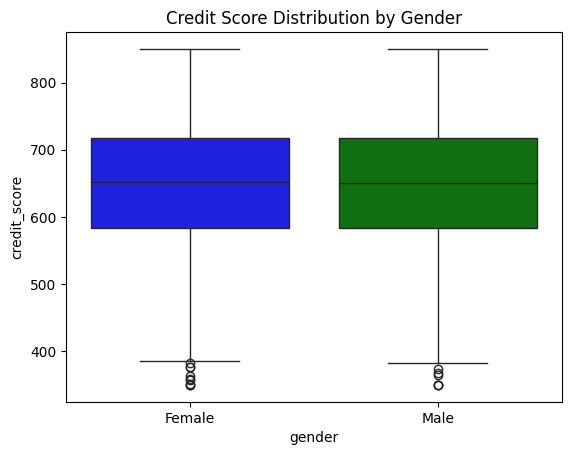

In [113]:
palette = {"Male": "green", "Female": "blue"}
sns.boxplot(x='gender', y='credit_score', hue='gender', data=df, palette=palette)
plt.title('Credit Score Distribution by Gender')
plt.show()

### Analyzing Customer Churn

To understand customer retention and churn, the dataset includes a binary column **'has_exited'**, where **'0'** represents customers who have stayed with the bank, and **'1'** indicates those who have exited. 

By using the **value_counts()** function on this column, a clear distinction is drawn between retained and churned customers.

This statistic calculation reveals that **7,962 customers** have remained with the bank, whereas **2,038** have exited, providing a direct measure of the bank's customer retention and churn rates.

In [38]:
df['has_exited'].value_counts()

has_exited
0    7962
1    2038
Name: count, dtype: int64

4. **Running sns.barplot().** The **bar plot**, constructed from the previous calculation, shows that **79.62%** of customers have remained with the bank, while **20.38%** have opted to leave.

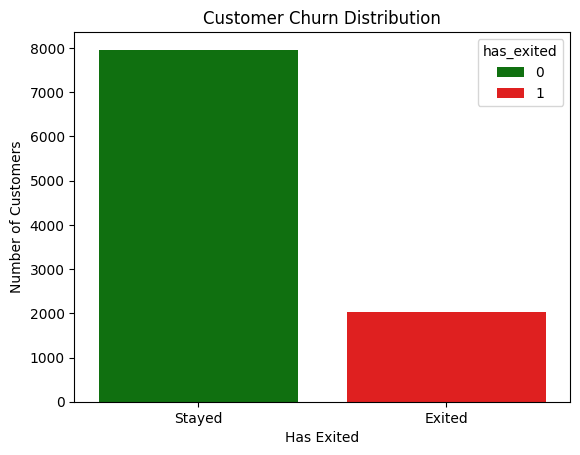

In [115]:
sns.barplot(x=df['has_exited'].value_counts().index, y=df['has_exited'].value_counts().values, hue=df['has_exited'].value_counts().index, palette=['green', 'red'])
plt.title('Customer Churn Distribution')
plt.xlabel('Has Exited')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Stayed', 'Exited'])  # Assigned "Stayed" and "Exited" labels for better readibility.
plt.show()

5. **Insights EDA**

After the **exploratory data analysis (EDA)**, it was identified that the majority of the bank's customers are aged between **30** and **40** years and a significant **20.38%** of the total customer base has churned. The analysis also highlighted that although both genders exhibit similar credit scores, notable distinctions were observed in the distribution of account balances, with many customers holding low or zero balances.
# C) Correlation Analysis

Building on these insights, correlation analysis is undertaken to quantitatively measure the relationships between customer attributes,for example:

- Age and has_exited (CHURN)
- Balance and has_exited (CHURN)
- Num_of_products amd has_exited (CHURN)
- credit_Score and has_exited (CHURN)
- Tenure and Balance
- Credit Score and Product Usage

Aiming to pinpoint the specific features that influence customer churn the most. This step focuses only on numerical data to ensure robustness and relevance of the results.

1. **Running df.info()**

To ensure our dataset is appropriately formatted for this numerical analysis, **best practices** dictate checking data types. Executing **df.info()** confirms that our dataset is well-organized with the correct data types suitable for correlation analysis.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   surname             10000 non-null  object 
 2   credit_score        10000 non-null  int64  
 3   geography           10000 non-null  object 
 4   gender              10000 non-null  object 
 5   age                 10000 non-null  int64  
 6   tenure_years        10000 non-null  int64  
 7   balance             10000 non-null  float64
 8   num_of_products     10000 non-null  int64  
 9   has_credit_card     10000 non-null  int64  
 10  is_active_member    10000 non-null  int64  
 11  estimated_salary    10000 non-null  float64
 12  has_exited          10000 non-null  int64  
 13  complain            10000 non-null  int64  
 14  satisfaction_score  10000 non-null  int64  
 15  card_type           10000 non-null  object 
 16  points_ea

Following the verification of data types with **df.info()**, it is observed that the dataset includes **int64**, **float64**, and **object** types. 

2. **Running df.select_dtypes().**

For a focused correlation analysis, only numerical values are relevant. The **df.select_dtypes()** function is utilized to filter out these numerical columns **int64** and **float64**. 

3. **Running df.numeric.corr().**

Subsequently, **df_numeric.corr()** is applied to calculate the correlation matrix, providing insights into the interdependencies among the numerical features which could influence customer churn.

In [41]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# Compute the correlation matrix
df_numeric.corr()

,customer_id,credit_score,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,has_exited,complain,satisfaction_score,points_earned
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
tenure_years,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
num_of_products,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
has_credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
is_active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
has_exited,-0.006203,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628


# Analysis of Correlation Matrix

The correlation matrix quantifies the relationship between pairs of variables in our dataset. Each entry in the matrix, known as a correlation coefficient, ranges from **-1** to **1.** A value close to **1** indicates a strong positive relationship, close to **-1** suggests a strong negative relationship, and a value around **0** implies no significant relationship.

### Key Insights from the Correlation Analysis:

- **Customer Complaints and Churn:**

There is a strong positive correlation of **0.995693** between **'Has Exited'** and **'Complain'**, indicating that customer complaints are highly predictive of churn. This insight underscores the impact of customer satisfaction on their likelihood to leave the bank.

- **Customer Tenure and Churn:**

The correlation between **'Tenure Years'** and **'Has Exited'** is **-0.013656**, suggesting a very slight tendency for longer-tenured customers to remain with the bank, although this relationship is weak.


- **Number of Products and Churn:**

There is a negative correlation of **-0.046357** between **'Num of Products'** and **'Has Exited'**, implying that customers with more products are less likely to churn. This may reflect greater customer engagement with the bank's offerings.

### Dython Library

For the visualizations, the Dython library is employed, accessible at: https://shakedzy.xyz/dython/

- Dython Library installation: pip install dython

To visualize these correlations effectively, the **Python library Dython** was utilized. Specifically, the associations function from **dython.nominal** was employed to create a comprehensive visualization of the correlation matrix, enhancing the interpretability of the data for strategic decision-making.


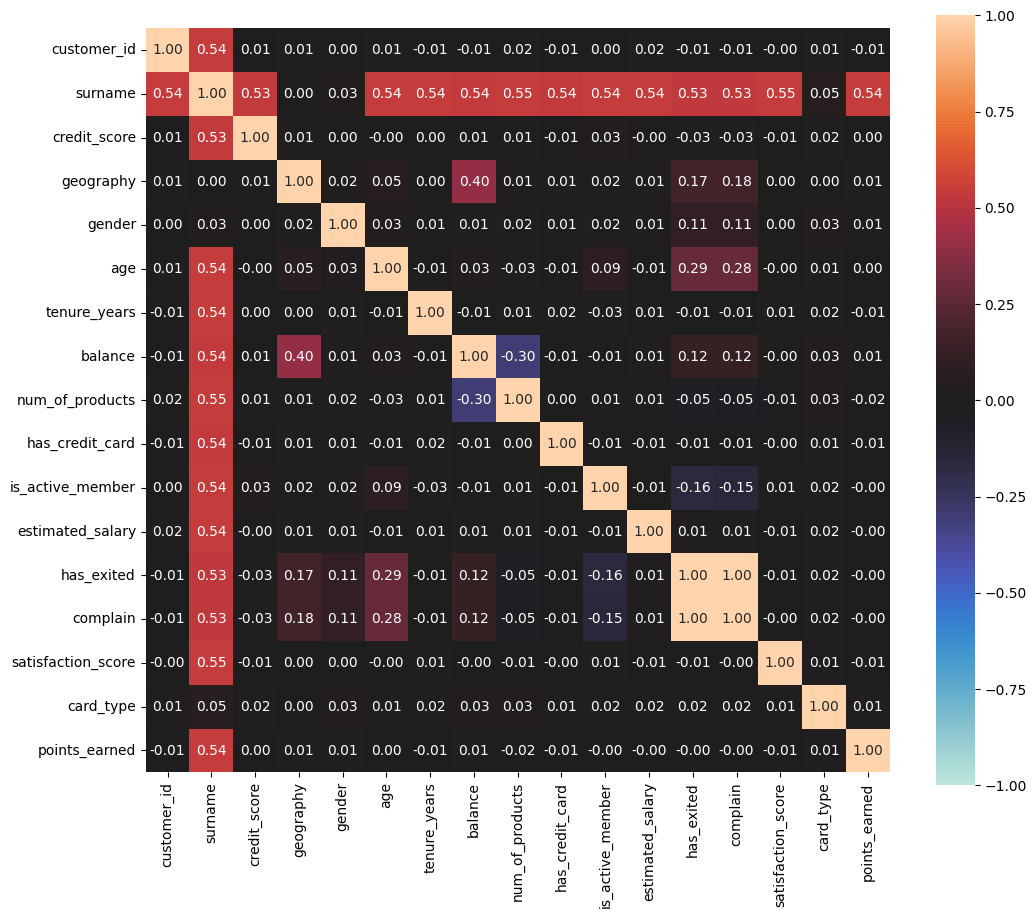

{'corr':                     customer_id   surname  credit_score  geography    gender  \
 customer_id            1.000000  0.542992      0.005308   0.007819  0.002641   
 surname                0.542992  1.000000      0.533637   0.000000  0.026769   
 credit_score           0.005308  0.533637      1.000000   0.008939  0.002857   
 geography              0.007819  0.000000      0.008939   1.000000  0.022178   
 gender                 0.002641  0.026769      0.002857   0.022178  1.000000   
 age                    0.009497  0.540171     -0.003965   0.049154  0.027544   
 tenure_years          -0.014883  0.540418      0.000842   0.003942  0.014733   
 balance               -0.012419  0.538557      0.006268   0.401114  0.012087   
 num_of_products        0.016972  0.545434      0.012238   0.011981  0.021859   
 has_credit_card       -0.014025  0.535501     -0.005458   0.014951  0.005766   
 is_active_member       0.001665  0.540356      0.025651   0.023032  0.022544   
 estimated_salary   

In [42]:
from dython.nominal import associations
associations(df, figsize=(12, 10))

# Ideal attributes for Predictive Modeling:

To enhance the **predictive modeling** for customer churn, it is crucial to focus on attributes that exhibit significant relationships with churn. The correlation analysis highlights several key attributes:

- Complain (0.995693)
- Num of Products (-0.046357)
- Age (0.285296)
- Balance (-0.304180)

These attributes are vital for understanding customer behavior and their likelihood of leaving the bank. 

Having identified the most relevant attributes for our model, the next step involves refining the dataset. This involves removing unnecessary columns to improve model performance. 

Using the **df.drop()** method, irrelevant columns are eliminated, and the first ten records are displayed with **head(10)** to ensure the modifications are correctly applied.

In [43]:
df.head(1)

,customer_id,surname,credit_score,geography,gender,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,has_exited,complain,satisfaction_score,card_type,points_earned
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


In [44]:
df_churn = df.drop(columns=['customer_id', 'surname', 'credit_score', 'geography', 
                    'gender', 'tenure_years', 'has_credit_card', 'is_active_member',
                    'estimated_salary','satisfaction_score', 'card_type', 'points_earned'])
df_churn.head(10)

,age,balance,num_of_products,has_exited,complain
0,42,0.00,1,1,1
1,41,83807.86,1,0,1
2,42,159660.80,3,1,1
3,39,0.00,2,0,0
4,43,125510.82,1,0,0
5,44,113755.78,2,1,1
6,50,0.00,2,0,0
7,29,115046.74,4,1,1
8,44,142051.07,2,0,0
9,27,134603.88,1,0,0


To verify that all the information and isngiths is correct, it will display our correlations in the new assigned name **df_churn.**

In [45]:
df_churn.corr()

,age,balance,num_of_products,has_exited,complain
age,1.000000,0.028308,-0.030680,0.285296,0.283530
balance,0.028308,1.000000,-0.304180,0.118577,0.119124
num_of_products,-0.030680,-0.304180,1.000000,-0.047611,-0.046357
has_exited,0.285296,0.118577,-0.047611,1.000000,0.995693
complain,0.283530,0.119124,-0.046357,0.995693,1.000000


To simplify the visualization and interpretation of the correlation results within our predictive model, specific techniques are employed. 

Utilizing the **unstack()** method followed by **sort_values()**, the correlations are rearranged into a single column format, making it easier to assess the strength and direction of each relationship between attributes.

In [46]:
correlation_matrix = df_churn.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

age              age                1.000000
                 balance            0.028308
                 num_of_products   -0.030680
                 has_exited         0.285296
                 complain           0.283530
balance          age                0.028308
                 balance            1.000000
                 num_of_products   -0.304180
                 has_exited         0.118577
                 complain           0.119124
num_of_products  age               -0.030680
                 balance           -0.304180
                 num_of_products    1.000000
                 has_exited        -0.047611
                 complain          -0.046357
has_exited       age                0.285296
                 balance            0.118577
                 num_of_products   -0.047611
                 has_exited         1.000000
                 complain           0.995693
complain         age                0.283530
                 balance            0.119124
          

In [47]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

balance          num_of_products   -0.304180
num_of_products  balance           -0.304180
has_exited       num_of_products   -0.047611
num_of_products  has_exited        -0.047611
complain         num_of_products   -0.046357
num_of_products  complain          -0.046357
                 age               -0.030680
age              num_of_products   -0.030680
                 balance            0.028308
balance          age                0.028308
                 has_exited         0.118577
has_exited       balance            0.118577
complain         balance            0.119124
balance          complain           0.119124
complain         age                0.283530
age              complain           0.283530
has_exited       age                0.285296
age              has_exited         0.285296
has_exited       complain           0.995693
complain         has_exited         0.995693
age              age                1.000000
num_of_products  num_of_products    1.000000
balance   

In [48]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              10000 non-null  int64  
 1   balance          10000 non-null  float64
 2   num_of_products  10000 non-null  int64  
 3   has_exited       10000 non-null  int64  
 4   complain         10000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 468.8 KB


The dataset is now prepared for developing the **predictive Machine Learning Decision Tree model.**

*Note: If you find the issue where you have data in Str or object. You can use map() function, for achieve solve the issue.*

- Example: has_exited and complain are objects and appear the words Yes and No, and we need to replace it.

    - df_churn['has_exited'] = df_churn['has_exited'].map({'Yes': 1, 'No': 0})
    - df_churn['complain'] = df_churn['complain'].map({'Yes': 1, 'No': 0})

- And after you can check the outcome with the following query*

    - print(df_churn['has_exited'].value_counts())
    - print(df_churn['complain'].value_counts())

Following best practices, a new dataframe called **df_numbers** was created as a copy of **df_churn**. This approach ensures that the original data in **df_churn** remains unaffected, allowing for easy reference and retrieval of information at any time.



In [49]:
df_numbers=df_churn.copy()
df_numbers.head(10)

,age,balance,num_of_products,has_exited,complain
0,42,0.00,1,1,1
1,41,83807.86,1,0,1
2,42,159660.80,3,1,1
3,39,0.00,2,0,0
4,43,125510.82,1,0,0
5,44,113755.78,2,1,1
6,50,0.00,2,0,0
7,29,115046.74,4,1,1
8,44,142051.07,2,0,0
9,27,134603.88,1,0,0


# D) Model Building

In this stage, the development of the predictive model using a **"Decision Tree"** requires additional libraries. These libraries facilitate the splitting of data, visualization of the decision tree, and rendering of graphs.

- **SKLEARN:** Essential for machine learning tasks, including data splitting, model training, and evaluation.

- **PyDotPlus:** An improved version of the old pydot project, used for creating visual representations of the decision tree. Installation: **"pip install pydotplus"**

 
- **GraphViz:** Necessary for rendering the decision tree graphs into various output formats. Installation: **pip install graphviz + pip brew install graphviz (MacOS).**


- **Six:** A Python 2 and 3 compatibility library. Installation: **"pip install six"**

The steps involved in building the Decision Tree model include:

1. **Splitting the Data:** Dividing the dataset into training and testing sets to evaluate the model's performance.
2. **Training the Model:** Using the training set to fit the Decision Tree model.
3. **Model Evaluation and Testing:** Assessing the model's accuracy and performance using the testing set.
 
To start, the **train_test_split** function from the **scikit-learn** library will be imported to facilitate the division of data into training and testing sets.

In [50]:
from  sklearn.model_selection import train_test_split

# 1. Splitting the Data

In this step, the dataset is divided into two separate dataframes: **"inputs"** for the input variables (train data) and **"target"** for the target variable (churn). This division is essential for training the predictive model.

- **Train Data:** The input variables include
    - Age
    - Balance
    - Number of Products
    - Complain

In [77]:
# Train Data
inputs = df_numbers[['age', 'balance', 'num_of_products', 'complain']]

# Target
target = df_numbers['has_exited']

# Split the dataset into training and testing sets
# We confirm that all the columns has been placed and is not included the target.
features= list(inputs.columns)
print(features)

['age', 'balance', 'num_of_products', 'complain']


# 2. Training the Decision Tree Model

A Decision Tree model is trained using the input variables (inputs) and the target variable (target). The **DecisionTreeClassifier** from the **sklearn.tree** module is utilized for this purpose.

The model parameters such as **criterion='entropy'**, **splitter='best'**, and **max_depth=3** are specified to control the tree's growth and ensure optimal performance.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
model = model.fit(inputs,target)

Importing neccesary libraries for Decision Tree.

In [80]:
from IPython.display import Image  
from six import StringIO  

from sklearn.tree import export_graphviz
import pydotplus, graphviz

Now we are going to print the decision tree.

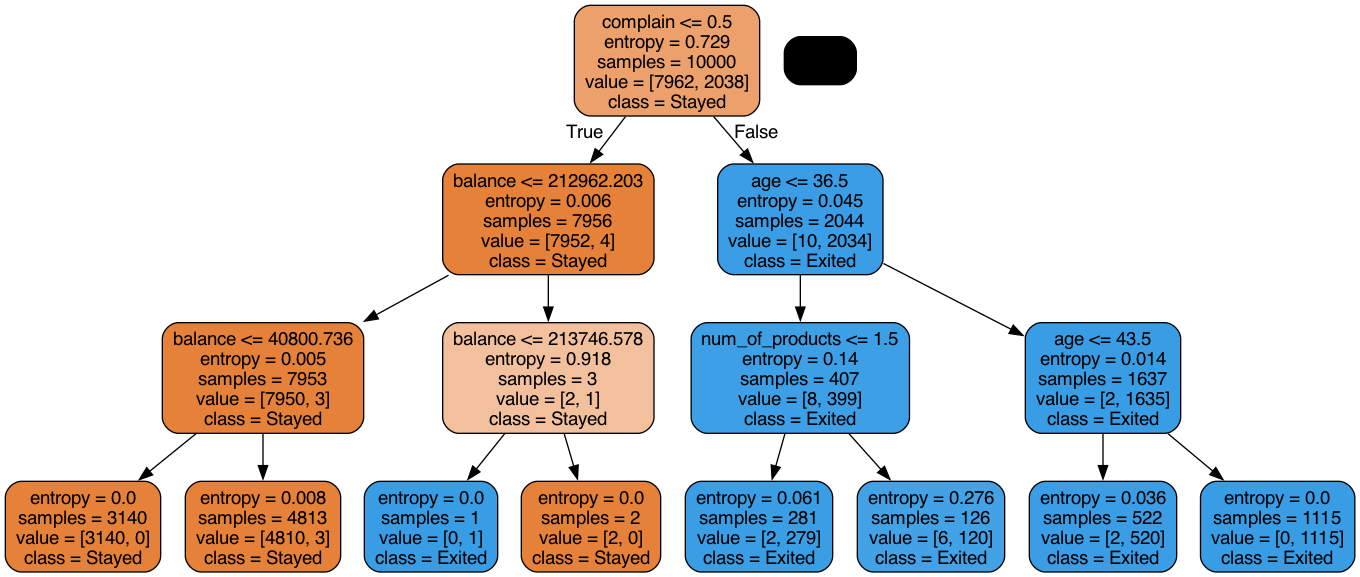

In [81]:
# StringIO: "This module implements a file-like class that reads and writes a string buffer (also known as memory files).
dot_data = StringIO()  

# Function to generate the graphic of decision tree
export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                feature_names=features, 
                class_names=["Stayed", "Exited"])

# Load graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# #Create PNG image
Image(graph.create_png(),width=800,height=900)


**Explanation Decision Tree**

The Decision Tree model for predicting customer churn is constructed with multiple levels of decision-making based on different customer attributes. 

### Root Node: Complain

- **Root Node:** The root node of the tree is **"Complain".** It asks if the number of complaints is less than or equal to **0.5.** This essentially checks if the customer has complained half the time or less frequently.

- **Depth 1:** The next node examines the **'Balance'.** If the balance is less than or equal to **212,962.203:** Most customers do not churn and if the age is less than or equal to **36.5:** Most customers churn (class = Exited).

- **Depth 2:** If the balance is less than or equal to **48,000.736: Customers do not churn (class = Stayed)** and if the balance is greater than **48,000.736** but less than or equal to **213,746.578: Customers do not churn (class = Stayed).**

- **Depth 3:** At the final depth, the decision tree refines the criteria to classify customers as either staying with the bank or exiting. This depth focuses on specific details such as age and balance to make accurate determinations. The blue boxes show class=Exited, which means **CHURN** detected.

To save Decision Tree in PDF Format:

In [116]:
# graph.write_pdf("DecisionTree.pdf")

To save Decision Tree in PNG Format.

In [62]:
#graph.write_png("DecisionTree.png")

# Model Accuracy

The Decision Tree model has demonstrated outstanding performance, achieving an accuracy of **99.87%** on the training dataset. This high level of accuracy indicates that the model is exceptionally effective in predicting whether customers will churn based on the input features provided.

In [82]:
model.score(inputs, target)

0.9987

# 3. Model Evaluation and Testing

Considerations:

- **Age:** Any positive integer
- **Balance:** Anye positive number
- **Number of products:** Any integer from 1 to a maximum observed in the dataset
- **Complain:** Indicates whether the customer has lodged complaints, with '0' representing 'No' and '1' representing 'Yes'.
- **Churn (Target Variable):** This is what the model predicts; '0' for customers who stay (No Churn) and '1' for customers who exit (Churn).

**TEST 1**

**Customer Profile for Test Scenario:** Imaginary Customer

- **Age:** 45 years old.
- **Account Balance:** $50,000, indicating a high level of financial engagement with the bank.
- **Number of Products:** 3,suggesting a diverse use of the bank's offerings.
- **Complaint History:** No complais.

**Scenario Description:** A 45-year-old customer with a substantial account balance of $50,000, who utilizes three of the bank's products and has not lodged any complaints, is evaluated to predict churn likelihood.

In [84]:
test_input = pd.DataFrame([[45, 50000, 3, 0]], columns=['age', 'balance', 'num_of_products', 'complain'])

# Use the model to make a prediction
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [0]


The output is 'Prediction: [0]':

It indicates that the customer **is not likely to CHURN** based on their profile. This suggests that customers with a higher balance, multiple products, and no complaints are generally more content and less likely to leave the bank.

**TEST 2**

**Customer Profile for Test Scenario:** Imaginary Customer

- **Age:** 30 years old.
- **Account Balance:** $1,200, indicating a lower level of financial engagement with the bank.
- **Number of Products:** 1, suggesting limited use of the bank's services.
- **Complaint History:** Has lodged complaints.

**Scenario Description:** A 30-year-old customer with a modest account balance of $1,200, who uses only one of the bank's products and has a history of complaints, is evaluated to predict churn likelihood.

In [92]:
test_input = pd.DataFrame([[30, 1200, 1, 1]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


The result for TEST 2 suggests that the customer is **likely to CHURN.** This scenario highlights the risk factors associated with lower engagement and customer dissatisfaction, which contribute to a higher likelihood of leaving the bank.

**TEST 3**

**Customer Profile for Test Scenario:** Randomly selecting a real customer from the database to compare the actual result with the model's prediction.

- **Age:** 37 years old
- **Account Balance:** $35,000, indicating a moderate level of financial involvement with the bank.
- **Number of Products:** 2, showing a fair utilization of the bank’s services.
- **Complaint History:** No complaints
- **Actual Outcome:** CHURN = 0 (has_exited = NO)

**Scenario Description:** A customer who is 37 years old with a decent account balance of $35,000, holds two of the bank's products, and has not lodged any complaints, is assessed to understand their likelihood of churning.

In [117]:
test_input = pd.DataFrame([[37, 35000, 2, 0]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [0]


**Result Test 3:** indicates that the customer **is not likely to CHURN.** This test underscores that moderate financial engagement and satisfaction with bank services (evidenced by no complaints) are crucial factors that might encourage customers to stay with the bank longer.

**TEST 4**

**Customer Profile for Test Scenario:** Randomly selecting a real customer from the database to compare the actual result with the model's prediction.

- **Age:** 45 years old
- **Account Balance:** $100,000, indicating a high level of financial engagement with the bank.
- **Number of Products:** 1, suggesting limited diversity in bank product usage despite significant funds.
- **Complaint History:** Has lodged complaints
- **Actual Outcome:** CHURN = 1 (has_exited = YES)

**Scenario Description:** 45-year-old customer with a substantial bank balance of $100,000 but limited product diversity and a history of complaints.

In [100]:
test_input = pd.DataFrame([[45, 100000, 1, 1]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


**Result Test 4:** The output indicates that the customer **is likely to CHURN.** Despite a high balance, the combination of limited product diversity and a history of complaints contributes to a higher churn risk. 

**TEST 5**

**Customer Profile for Test Scenario:** Randomly selecting a real customer from the database to compare the actual result with the model's prediction.

- **Age:** 25 years old
- **Account Balance:** $140,000, showing significant financial involvement with the bank.
- **Number of Products:** 3, indicating a broad engagement across the bank's product offerings.
- **Complaint History:** Has lodged complaints
- **Actual Outcome:** CHURN = 1 (has_exited = YES)

**Scenario Description:** A young customer who is 25 years old with a high account balance of $140,000, utilizes 3 of the bank's products, and has lodged complaints.

In [106]:
test_input = pd.DataFrame([[25, 140000, 3, 1]], columns=['age', 'balance', 'num_of_products', 'complain'])
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


**Result Test 5:** The output 'Prediction: [1]' indicates that the customer **is likely to CHURN**. Despite having a high balance and using multiple products, the presence of complaints suggests significant dissatisfaction, which heavily influences the likelihood of churn.

# Developed by Omar Mac Pherson

# More Projects:

# LinkedIn: https://www.linkedin.com/in/omaralan
# GitHub: https://omarmacpherson.github.io/portfolio/
# Tableau: https://shorturl.at/N9rpX

